In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import h5py
from pca import PCA

(7291, 256)
(7291,)
(2007, 256)
(2007,)


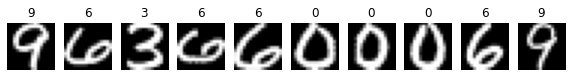

In [2]:
# Load USPS handwritten digits
with h5py.File("./dataset/usps.h5", 'r') as hf:
    train = hf.get('train')
    train_x = train.get('data')[:]
    train_y = train.get('target')[:]
    test = hf.get('test')
    test_x = test.get('data')[:]
    test_y = test.get('target')[:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
    
# Display some samples
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(np.reshape(test_x[i],[16,16]), cmap='gray')
    plt.axis("off")
    plt.title(str(test_y[i]))

In [3]:
pca = PCA(method='cov') # use covariance method

train_x_pca = pca.fit(train_x, k=100) # fit the PCA model
test_x_pca = pca.transform(test_x, k=100) # transform testing data

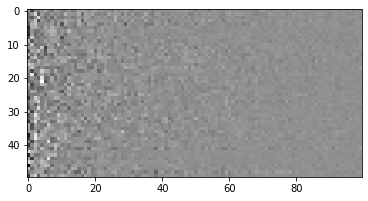

In [4]:
# plot the first 50 transformed testing samples
plt.imshow(test_x_pca[:50], cmap='gray')

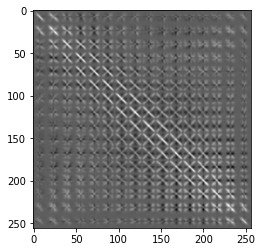

In [5]:
# plot the covariance matrix
plt.imshow(pca.cov, cmap='gray')

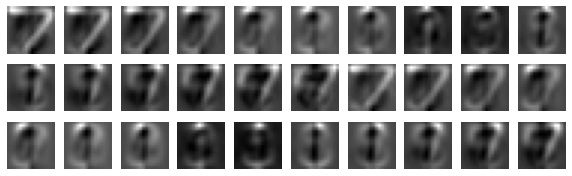

In [6]:
# Better visualize the covariance matrix (first 20 rows) by reshaping it
plt.figure(figsize=(10,3))
for i in range(3):
    for j in range(10):
        plt.subplot(3,10,i*10+j+1)
        plt.imshow(np.reshape(pca.cov[i*10+j], [16,16]), cmap='gray')
        plt.axis("off")

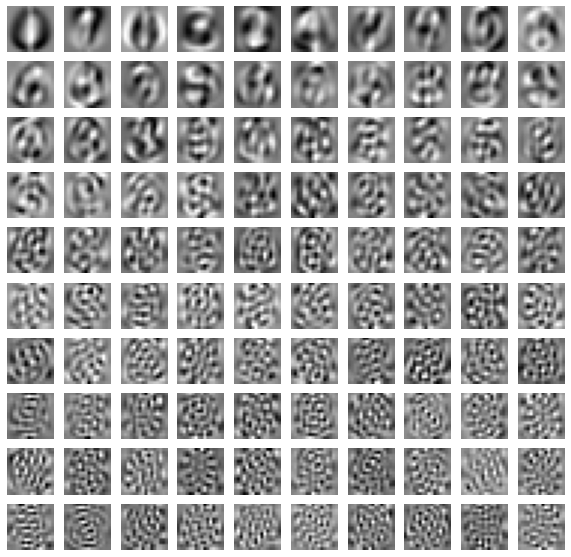

In [7]:
# Show the first 100 principle components (looks kinda like the 2D discreate cosine transform basis :)
plt.figure(figsize=(10,10))
for i in range(10):
    for j in range(10):
        plt.subplot(10,10,i*10+j+1)
        plt.imshow(np.reshape(pca.pc[:,i*10+j],[16,16]), cmap='gray')
        plt.axis("off")

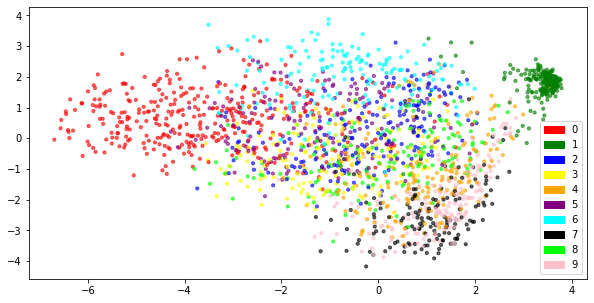

In [8]:
# scatter plot the first two dimensions
cmap = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'yellow',
    4: 'orange',
    5: 'purple',
    6: 'cyan',
    7: 'black',
    8: 'lime',
    9: 'pink'
}
c = [cmap[i] for i in test_y]
plt.figure(figsize=[10,5])
plt.scatter(x=test_x_pca[:,0], y=test_x_pca[:,1], s=10, alpha=0.6, c=c)
legend = [mpatches.Patch(color=cmap[i], label=i) for i in range(10)]
plt.legend(handles=legend)

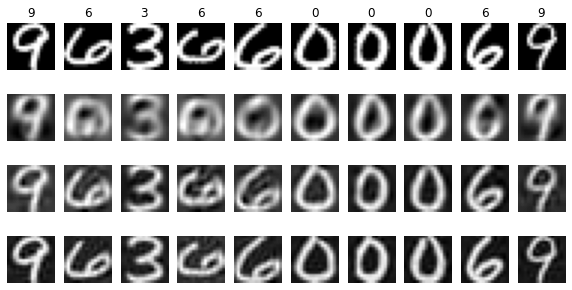

In [9]:
# Now we attempt to transform the compressed data back

# Display some samples
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(4,10,i+1)
    plt.imshow(np.reshape(test_x[i],[16,16]), cmap='gray')
    plt.axis("off")
    plt.title(str(test_y[i]))

# k = 10
test_x_pca = pca.transform(test_x, k=10) # transform testing data
test_x_inv_pca = pca.inverse_transform(test_x_pca) # transform the compressed data back
for i in range(10):
    plt.subplot(4,10,10+i+1)
    plt.imshow(np.reshape(test_x_inv_pca[i],[16,16]), cmap='gray')
    plt.axis("off")

# k = 50
test_x_pca = pca.transform(test_x, k=50) # transform testing data
test_x_inv_pca = pca.inverse_transform(test_x_pca) # transform the compressed data back
for i in range(10):
    plt.subplot(4,10,20+i+1)
    plt.imshow(np.reshape(test_x_inv_pca[i],[16,16]), cmap='gray')
    plt.axis("off")
    
# k = 100
test_x_pca = pca.transform(test_x, k=100) # transform testing data
test_x_inv_pca = pca.inverse_transform(test_x_pca) # transform the compressed data back
for i in range(10):
    plt.subplot(4,10,30+i+1)
    plt.imshow(np.reshape(test_x_inv_pca[i],[16,16]), cmap='gray')
    plt.axis("off")